# Data generator applied to structural MRI

In [2]:
%matplotlib inline
from data_generator import DataGenerator
import numpy as np
import matplotlib.pyplot as plt


Load data and verify shape

In [3]:
data = np.load('/home/aulloa/Documents/data/smriqc.npy')
mask = np.load('/home/aulloa/Documents/data/smri_mask.npy')

print(data.shape)
print(data.dtype)
print(mask.shape)
print(mask.dtype)
print(mask.sum())

(290, 304472)
float64
(91, 109, 91)
bool
304472


Draw a brain for visual inspection

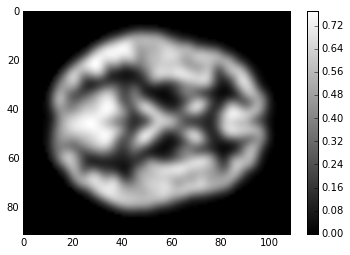

In [4]:
def draw_brain(masked, mask):
    temp = np.zeros(mask.shape)
    temp[mask] = masked
    plt.imshow(temp[:,:,40], cmap='gray')
    plt.colorbar()

draw_brain(data[0,:], mask)

Generate 100 samples and save them on the iterator gen.

In [5]:
gen = DataGenerator(data, 20, 100, 1, 'normal')

new_data = next(gen)
print(new_data.shape)

(100, 304472)


Draw a couple of fake brains for visual inspection

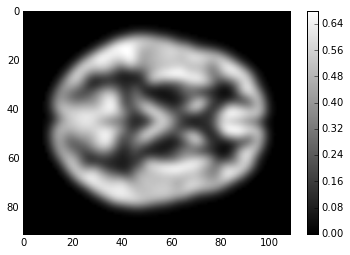

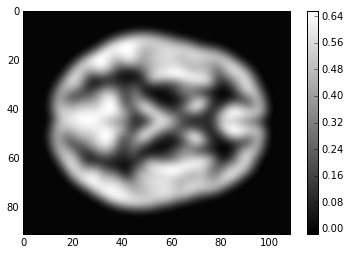

In [21]:
draw_brain(new_data[0,:] - new_data[0,:].min(), mask)
plt.figure()
draw_brain(new_data[2,:] - new_data[1,:].min(), mask)

Visually the fake data is very similar to original data. Using the correlation matrix of the fake data we can observe that there is some variability among different samples.

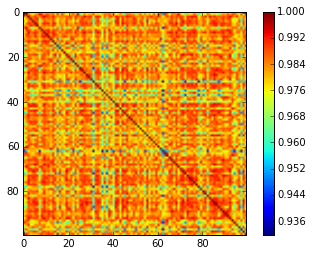

In [13]:
C = np.corrcoef(new_data)
plt.imshow(C)
plt.colorbar()

-0.41493145762820599